In [1]:
from utils import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

### Carregando o Dataset

In [2]:
df = pd.read_csv('../data/raw_data/data.csv')

### Verificando valores NaN

In [3]:
# Verificando quais colunas possuem valores NaN
nan_train = df.isnull().sum()
nan_train = nan_train[nan_train > 0]

print(nan_train)

Series([], dtype: int64)


### Separando os Dados

In [4]:
df_train, df_val, df_test = split_data(df, train_frac=0.7, val_frac=0.15, test_frac=0.15)
# df_train, df_val, df_test = split_data(df)

In [5]:
df_train_indoor = df_train[df_train['indoor'] == True]
df_train_outdoor = df_train[df_train['indoor'] == False]

df_val_indoor = df_val[df_val['indoor'] == True]
df_val_outdoor = df_val[df_val['indoor'] == False]

In [6]:
print("Train indoor size: ", df_train_indoor.shape[0])
print("Train outdoor size: ", df_train_outdoor.shape[0])

print("Validation indoor size: ", df_val_indoor.shape[0])
print("Validation outdoor size: ", df_val_outdoor.shape[0])

Train indoor size:  3225
Train outdoor size:  1517
Validation indoor size:  701
Validation outdoor size:  315


In [7]:
df_train_outdoor = balance_distribution(df_train_outdoor)
df_val_outdoor = balance_distribution(df_val_outdoor)

In [8]:
df_train = pd.concat([df_train_indoor, df_train_outdoor], ignore_index=False)
df_train = df_train.sample(frac=1, replace=False).reset_index(drop=True)

df_val = pd.concat([df_val_indoor, df_val_outdoor], ignore_index=False)
df_val = df_val.sample(frac=1, replace=False).reset_index(drop=True)

#### Plotando distribuição dos usuários no conjunto de treino

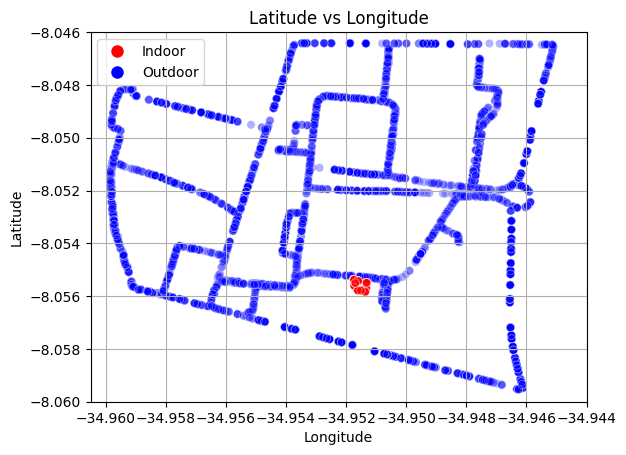

In [9]:
plot_distribution_comp(df_train)

In [10]:
map = plot_folium_map(df_train_indoor[['lat', 'lon']].values, df_train_outdoor[['lat', 'lon']].values, False, 'Outdoor', 'Indoor')
map

### Normalizando os dados

In [11]:
columns_to_normalize = [
    'rssi_1_1', 'rssi_1_2', 'rssi_1_3',
    'rssi_2_1', 'rssi_2_2', 'rssi_2_3',
    'rssi_3_1', 'rssi_3_2', 'rssi_3_3',
    'delay_1', 'delay_2', 'delay_3'
]

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(df_train[columns_to_normalize])

MinMaxScaler()

In [14]:
df_train[columns_to_normalize] = scaler.transform(df_train[columns_to_normalize])
df_val[columns_to_normalize] = scaler.transform(df_val[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])

In [15]:
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_test = pd.DataFrame(df_test)

In [16]:
df_train.head()

ponto_id  rssi_1_1  rssi_1_2  rssi_1_3  rssi_2_1  rssi_2_2  rssi_2_3  \
0      6659  0.490595  0.592069  0.473746  0.305143  0.748657  0.867459   
1      4799  0.316859  0.000000  0.303716  0.000000  0.209296  0.239055   
2      7057  0.420978  0.374651  0.412409  0.261084  0.398934  0.492072   
3      7408  0.472425  0.307408  0.482708  0.224991  0.264643  0.472029   
4      6959  0.534422  0.307408  0.539420  0.259290  0.264643  0.523022   

   rssi_3_1  rssi_3_2  rssi_3_3   delay_1   delay_2   delay_3       lat  \
0  0.332333  0.426865  0.306476  1.000000  0.285714  0.714286 -8.058890   
1  0.124152  0.277901  0.000000  0.666667  0.428571  0.285714 -8.055506   
2  0.773747  0.712558  0.294188  0.666667  0.571429  0.142857 -8.055580   
3  0.816936  0.455887  0.855267  0.666667  0.857143  0.000000 -8.054870   
4  0.389744  0.515420  0.671150  0.833333  0.857143  0.000000 -8.055760   

         lon  indoor  
0 -34.946260   False  
1 -34.951693    True  
2 -34.954590   False  
3 -34.957800   False  
4 -34.958900   False

### Salvando os conjuntos

In [17]:
dir = 'balanced_data'

In [18]:
df_train.to_csv(f'../data/{dir}/train.csv', index=False)
df_val.to_csv(f'../data/{dir}/validation.csv', index=False)
df_test.to_csv(f'../data/{dir}/test.csv', index=False)